In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras as ke
import pandas_profiling as pp
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

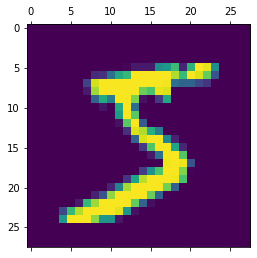

In [4]:
plt.matshow(x_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
x_train.max()

255

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
from keras.models import Sequential

In [10]:
from keras.layers import Dense,Activation,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Flatten(input_shape=[28,28]))

In [14]:
model.add(Dense(70,activation='relu'))

In [15]:
model.add(Dense(20,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 70)                54950     
_________________________________________________________________
dense_1 (Dense)              (None, 70)                4970      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1420      
Total params: 61,340
Trainable params: 61,340
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5276 - accuracy: 0.8493


In [19]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1209 - accuracy: 0.9633
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0563 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0337 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9900
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0259 - accuracy: 0.9914
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.022

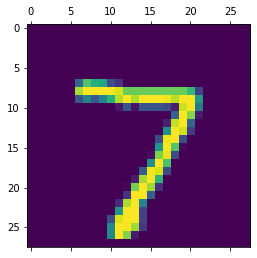

In [20]:
plt.matshow(x_test[0])

In [21]:
pred=model.predict(x_test)

In [22]:
pred

array([[2.7991861e-11, 1.1050971e-07, 5.2054188e-06, ..., 5.6868363e-16,
        1.8613647e-16, 3.7862580e-15],
       [5.8684302e-15, 1.2552736e-06, 9.9999869e-01, ..., 3.0304701e-22,
        2.5339260e-23, 1.0801606e-21],
       [2.2976256e-09, 9.9998128e-01, 2.0290183e-06, ..., 1.0899179e-14,
        8.5952948e-15, 2.4684021e-14],
       ...,
       [7.1734305e-20, 1.4953311e-11, 1.2759007e-15, ..., 1.4048945e-22,
        1.1338677e-20, 7.8795158e-22],
       [2.8468744e-17, 2.7187872e-17, 1.2850580e-17, ..., 1.2822268e-26,
        7.8316132e-26, 1.4269611e-26],
       [2.2623183e-16, 1.1342286e-16, 5.6923768e-11, ..., 6.0753989e-24,
        2.8481463e-23, 1.0927555e-23]], dtype=float32)

In [23]:
pred[0]
np.argmax(pred[0])

7

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0964 - accuracy: 0.9762


[0.09638427942991257, 0.9761999845504761]

In [25]:
predictions = model.predict(x_test)

In [26]:
predictions

array([[2.7991861e-11, 1.1050971e-07, 5.2054188e-06, ..., 5.6868363e-16,
        1.8613647e-16, 3.7862580e-15],
       [5.8684302e-15, 1.2552736e-06, 9.9999869e-01, ..., 3.0304701e-22,
        2.5339260e-23, 1.0801606e-21],
       [2.2976256e-09, 9.9998128e-01, 2.0290183e-06, ..., 1.0899179e-14,
        8.5952948e-15, 2.4684021e-14],
       ...,
       [7.1734305e-20, 1.4953311e-11, 1.2759007e-15, ..., 1.4048945e-22,
        1.1338677e-20, 7.8795158e-22],
       [2.8468744e-17, 2.7187872e-17, 1.2850580e-17, ..., 1.2822268e-26,
        7.8316132e-26, 1.4269611e-26],
       [2.2623183e-16, 1.1342286e-16, 5.6923768e-11, ..., 6.0753989e-24,
        2.8481463e-23, 1.0927555e-23]], dtype=float32)